In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from model import NaiveBayesFromScratch

In [2]:
# Đọc dữ liệu với encoding phù hợp
df = pd.read_csv("data/spam.csv", encoding="latin-1")

# Loại bỏ các cột rác sinh ra do dấu phẩy thừa
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Đổi tên cột cho dễ hiểu
df.columns = ["Label", "Message"]

# Xem 5 dòng đầu
df.head()


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df["Label"].value_counts()


Label
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
df["Message_raw"] = df["Message"]

In [5]:
def clean_text(text):
    text = text.lower()                      # chuyển về chữ thường
    text = re.sub(r'[^a-z\s]', '', text)     # loại ký tự đặc biệt và số
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["Message"] = df["Message"].apply(clean_text)


In [6]:
df[["Message_raw", "Message"]].head(5)

,Message_raw,Message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [7]:
df[["Label", "Message"]].to_csv(
    "data/spam_cleaned.csv",
    index=False
)


In [8]:
df["Label"] = df["Label"].map({
    "ham": 0,
    "spam": 1
})


In [9]:
X = df["Message"]
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [10]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=3000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
print("Train shape:", X_train_tfidf.shape)
print("Test shape :", X_test_tfidf.shape)

Train shape: (4457, 3000)
Test shape : (1115, 3000)


In [12]:
from model import NaiveBayesFromScratch

model = NaiveBayesFromScratch()
model.fit(X_train_tfidf, y_train)


In [13]:
# Dự đoán nhãn cho tập test
y_pred = model.predict(X_test_tfidf)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9730941704035875


In [ ]:
print(classification_report(
    y_test,
    y_pred,
    target_names=["Ham", "Spam"]
))


              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       965
        Spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



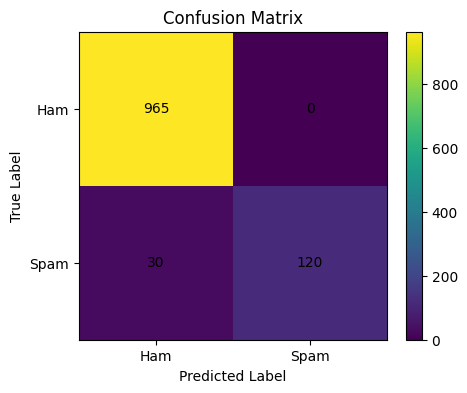

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0, 1], ["Ham", "Spam"])
plt.yticks([0, 1], ["Ham", "Spam"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [18]:
from sklearn.naive_bayes import MultinomialNB

sk_model = MultinomialNB()
sk_model.fit(X_train_tfidf, y_train)

sk_pred = sk_model.predict(X_test_tfidf)

print("Sklearn Accuracy:", accuracy_score(y_test, sk_pred))

Sklearn Accuracy: 0.9730941704035875


In [20]:
results = pd.DataFrame({
    "Message": X_test,
    "True Label": y_test,
    "Predicted Label": y_pred
})

results.to_csv("predictions.csv", index=False)